In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
class Kmeans:

	def __init__(self, X, K):
		self.X = X
		self.K = K

	def init_centers(self):
		# chọn ngẫu nhiên K hàng của X để làm centers
		return self.X[np.random.choice(self.X.shape[0], self.K, replace=False)]

	def assign_labels(self, centers):
		# tính khoảng cách của từng cặp một
		D = cdist(self.X, centers)
		# trả về chỉ số của center gần nhất
		return np.argmin(D, axis=1)

	def update_centers(self, labels):
		centers = np.zeros((self.K, self.X.shape[1]))
		for k in range(self.K):
			# chọn tất cả điểm có nhãn k
			Xk = self.X[labels == k, :]
			# lấy trung bình các điểm để tìm center k
			centers[k, :] = np.mean(Xk, axis=0)
		return centers

	def has_converged(self, centers, new_centers):
		# nếu hai tập centers là giống nhau thì dừng
		return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

	def train(self):
		centers = self.init_centers()
		labels = []
		iters = 0
		while True:
			labels = self.assign_labels(centers)
			new_centers = self.update_centers(labels)
			if self.has_converged(centers, new_centers): break
			centers = new_centers
		return (centers, labels)

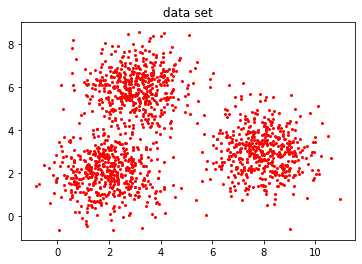

In [3]:
means = [[2, 2], [8, 3], [3, 6]] # các tâm dự tính :))
cov = [[1, 0], [0, 1]]           # ma trận hiệp phương sai
N = 500                          # tổng số điểm là 3 * N
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis=0)
K = 3

plt.plot(X[:, 0], X[:, 1], "ro", markersize=2)
plt.title("data set")
plt.show()

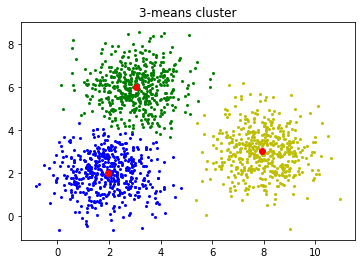

In [4]:
model = Kmeans(X, K)
centers, labels = model.train()

X0 = X[labels == 0, :]
X1 = X[labels == 1, :]
X2 = X[labels == 2, :]

plt.plot(X0[:, 0], X0[:, 1], "yo", markersize=2)
plt.plot(X1[:, 0], X1[:, 1], "go", markersize=2)
plt.plot(X2[:, 0], X2[:, 1], "bo", markersize=2)
plt.plot(centers[:, 0], centers[:, 1], "ro")
plt.title("3-means cluster")
plt.show()